<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Mini Project1</h3>
</div>

<img src = "https://www.cyclonis.com/images/2020/03/googleplay.jpg" width=50%>

## Importing the libraries

In [29]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Load and Prepare Data

In [30]:
df = pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## EDA

In [31]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [32]:
df.shape

(10841, 13)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [34]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [35]:
type(df.head)

method

In [36]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [37]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Data Preprocessing


In [38]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


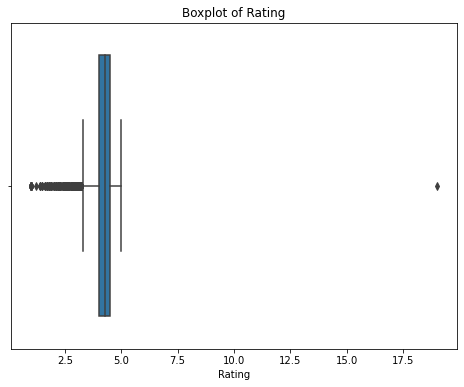

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Rating'])
plt.title("Boxplot of Rating")
plt.show()

In [40]:
print (df[df['Rating'] == 19])

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [41]:
df = df.drop(10472, errors='ignore')

In [42]:
df = df[df['Rating'] <= 5]

In [43]:
df['Rating_NaN'] = df["Rating"].isnull().astype(int)

In [44]:
median_rating = df['Rating'].median()
df['Rating'] = df['Rating'].fillna(median_rating)

In [45]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
Rating_NaN        0
dtype: int64

In [46]:
mode_current_ver = df['Current Ver'].mode()[0]
df['Current Ver'] = df['Current Ver'].fillna(mode_current_ver)

mode_android_ver = df['Android Ver'].mode()[0]
df['Android Ver'] = df['Android Ver'].fillna(mode_android_ver)

In [47]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Rating_NaN        0
dtype: int64

## Strorytelling - Visualization


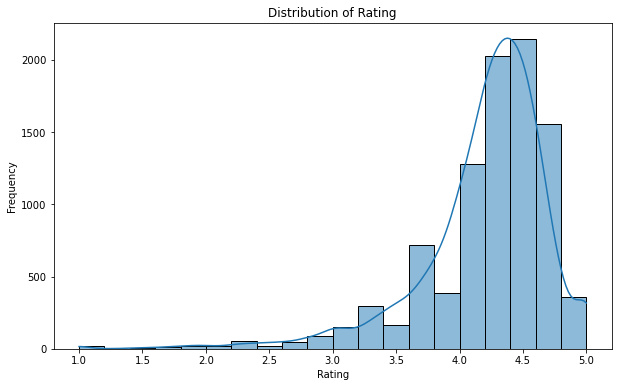

In [48]:
#بررسی توزیع و فراوانی مقادیر Rating
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Distribution of Rating")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

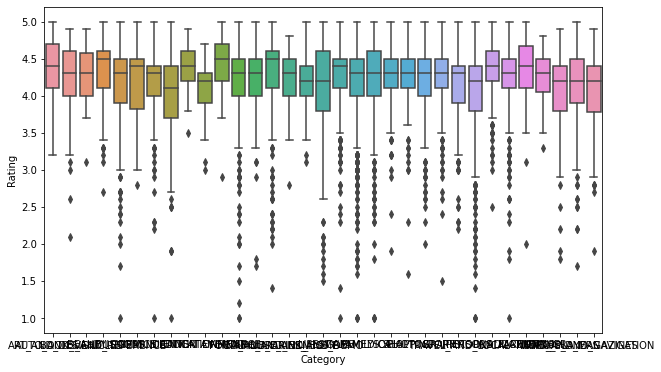

In [49]:
#بررسی توزیع و وجود مقادیر پرت (outliers) در رتبه بندی اپلیکیشن ها.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xlabel("Category")
plt.ylabel("Rating")
plt.show()

C:\Users\Tolu\AppData\Local\Temp\ipykernel_1088\2851578901.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace("+", "").str.replace(',', '').astype(int)


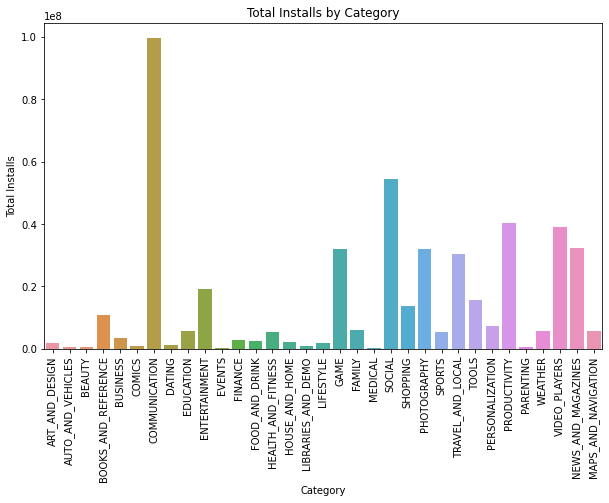

In [50]:
# مقایسه تعداد نصب ها بین دسته بندی های مختلف
df['Installs'] = df['Installs'].str.replace("+", "").str.replace(',', '').astype(int)

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Installs', data=df, ci=None)
plt.xticks(rotation=90)
plt.title('Total Installs by Category')
plt.xlabel('Category')
plt.ylabel("Total Installs")
plt.show()

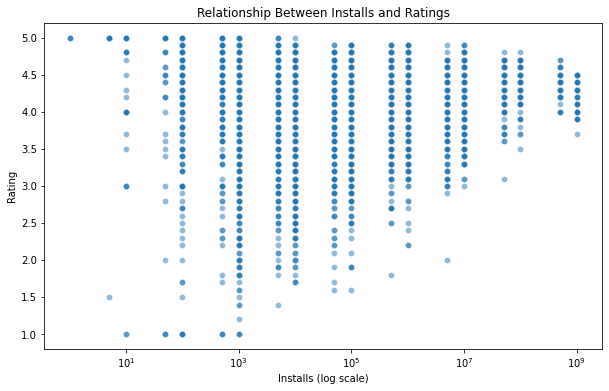

In [51]:
#تحلیل ارتباط بین تعداد نصب ها و رتبه بندی
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Rating', data=df, alpha=0.5)
plt.xscale('log')
plt.title("Relationship Between Installs and Ratings")
plt.xlabel("Installs (log scale)")
plt.ylabel('Rating')
plt.show()

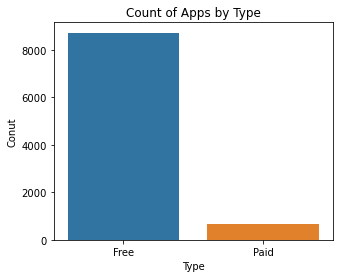

In [52]:
#شمارش تعداد اپلیکیشن ها بر اساس نوع (Type)
plt.figure(figsize=(5, 4))
sns.countplot(x='Type' , data=df)
plt.title("Count of Apps by Type")
plt.xlabel("Type")
plt.ylabel("Conut")
plt.show()

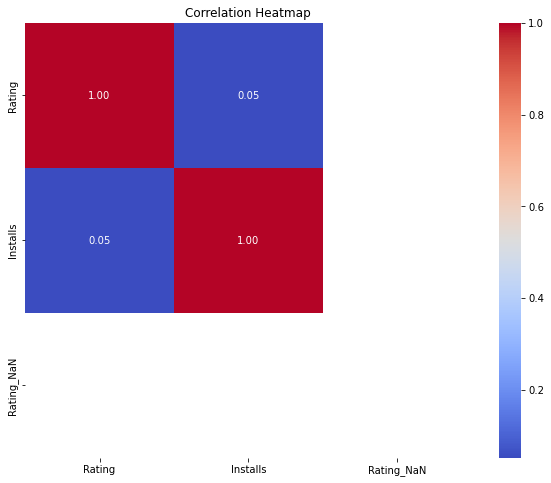

In [53]:
#بررسی همبستگی بین ویژگی های عددی
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Send us the Result (Maktabkhoone)

In [55]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model to a file
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))
